In [1]:
import numpy as np
import scipy    
import matplotlib.pyplot as plt

In [2]:
def mconv(x, nx, y, ny):
    r = np.convolve(x, y)
    return r, np.array(range(nx[0] + ny[0], nx[-1] + ny[-1] + 1))

def shift(x, n, m):
    return x, n + m

def reverse(x, n):
    return np.flip(x), -np.flip(n)

def signal_op(x, nx, y, ny, op='add'):
    nr = np.array(range(min(nx[0], ny[0]), max(nx[-1], ny[-1]) + 1))
    t1, t2 = np.zeros(len(nr)), np.zeros(len(nr))
    t1[nx - nx[0]], t2[ny - ny[0]] = x, y
    if op == 'add':
        return t1 + t2, nr
    else:
        return t1 * t2, nr

def correlate(x, nx, y, ny):
    x_rev, nx_rev = reverse(x, nx)
    return mconv(y, ny, x_rev, nx_rev)

In [7]:
def create_y(x, nx, D):
    y, ny = shift(x, nx, D)
    w = np.random.randn(len(y))
    r, _ = signal_op(y, ny, w, ny, 'add')
    return r, ny


# A, B, C, D = 3, 7, 2, 2
A, B, C, D = 1, 2, 4, 0

x = [A, 11, B, 0, -1, 4, C]
nx = np.array(range(-3, 4))

# y(k) = x(k - D) + w(k)
y, ny = create_y(x, nx, D)
corr, k = correlate(x, nx, y, ny)
corr

array([  8.75763229,  43.03830966,  40.27023148,  -1.28610915,
        -5.14675465,  55.44873997, 130.74515059,  33.42888686,
        -5.69940437,  -8.04147059,  58.94848556,  27.03898246,
         1.99020033])

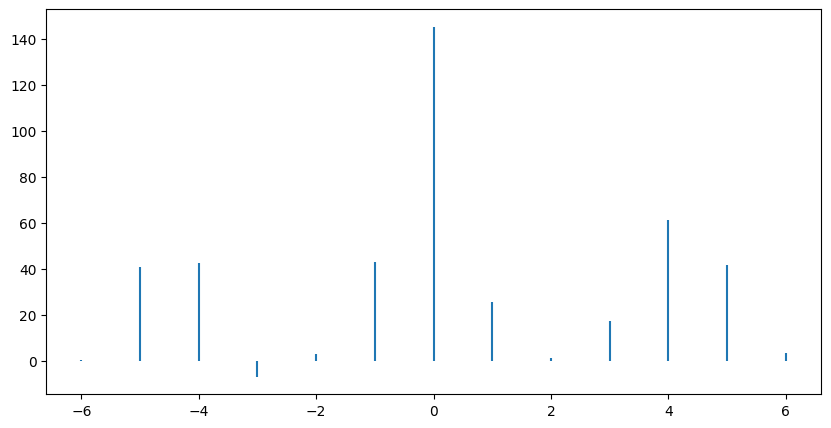

In [6]:
plt.figure(figsize=(10, 5))
plt.vlines(k, ymin=np.zeros(len(corr)), ymax=corr)
plt.show()

In [34]:
a = [1, -1, 0.9]
b = [1]
t = list(range(0, 121))
_, g = scipy.signal.dimpulse((b, a, 1), t=t)
g = np.concatenate([np.zeros(20), g[0].flatten()])
t = list(range(-20, 0)) + t
g

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e-01, -8.00000000e-01, -8.90000000e-01, -1.70000000e-01,
        6.31000000e-01,  7.84000000e-01,  2.16100000e-01, -4.89500000e-01,
       -6.83990000e-01, -2.43440000e-01,  3.72151000e-01,  5.91247000e-01,
        2.56311100e-01, -2.75811200e-01, -5.06491190e-01, -2.58261110e-01,
        1.97580961e-01,  4.30015960e-01,  2.52193095e-01, -1.34821269e-01,
       -3.61795054e-01, -2.40455912e-01,  8.51596366e-02,  3.01569958e-01,
        2.24926285e-01, -4.64866771e-02, -2.48920334e-01, -2.07082324e-01,
        1.69459761e-02,  

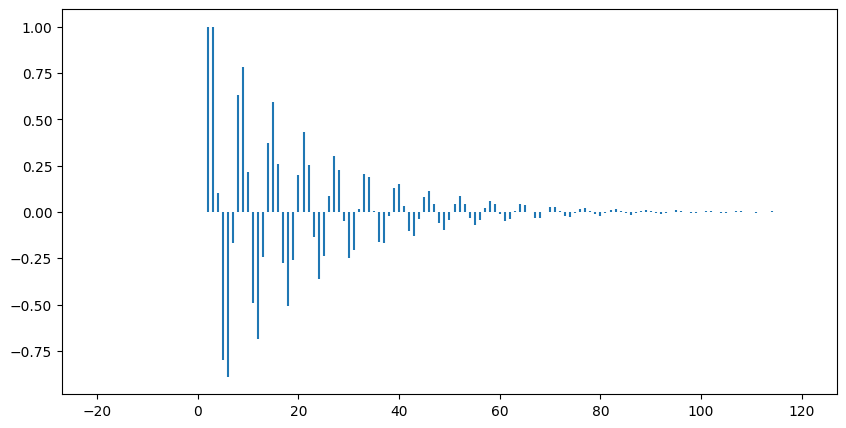

In [35]:
plt.figure(figsize=(10, 5))
plt.vlines(t, ymin=np.zeros(len(g)), ymax=g)
plt.show()